In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
files = [
    ('results_qlearning', 'qlearning'),
    ('results_generative', 'optimal-generative'),
    ('results_eq6_model_free', 'eq6_model_free'),
    ('results_onpolicy', 'onpolicy'),
    ('results_eq6_model_based', 'eq6_model_based'),
    ('results_generative_with_constraints', 'optimal-with-nav-constraints')
]

results = {}

for file_name, method in files:
    with open(f'{file_name}.pkl', 'rb') as f:
        results[method] = pickle.load(f)


In [3]:
def process_data(data, keys):
    res = {}
    for key in keys:
        iteration_episode_steps = []
        episode_steps = []
        for id in range(len(data)):
            iteration_episode_steps, temp = zip(*data[id][key])
            episode_steps.append(temp)
        episode_steps = np.array(episode_steps)
        
        res[key] = (iteration_episode_steps, episode_steps)
    return res

def compute_confidence(x, axis=0):
    z = np.array(x)
    mu = z.mean(axis)
    std = z.std(axis)
    N = z.shape[0]
    c = 1.96 * std / np.sqrt(N)
    return mu, mu - c, mu + c
        


/tmp/ipykernel_6407/4176997466.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  episode_steps = np.array(episode_steps)


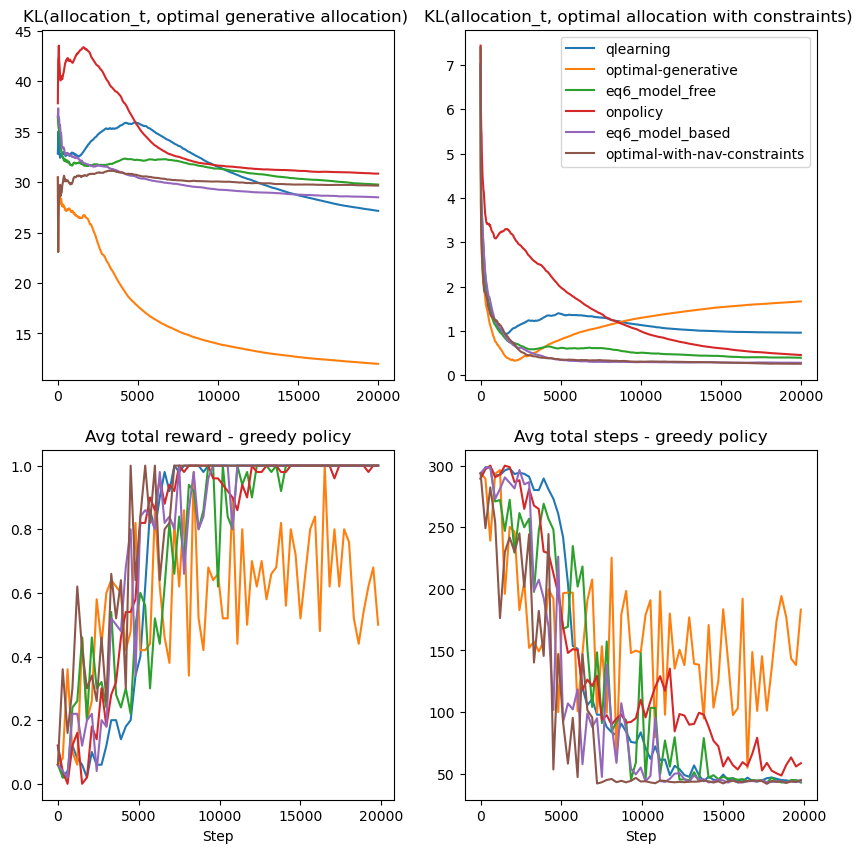

In [5]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
for file_name, method in files:
        
    data = process_data(results[method], results[method][0].keys())

    mu, lb, ub = compute_confidence(data['policy_diff_generative'][1])
    ax[0,0].plot(data['policy_diff_generative'][0], mu, label=method)
    ax[0,0].fill_between(data['policy_diff_generative'][0], lb, ub, alpha=0.3)
    ax[0,0].grid()
    ax[0,0].set_title('KL(allocation_t, optimal generative allocation) ')

    mu, lb, ub = compute_confidence(data['policy_diff_constraints'][1])
    ax[0,1].plot(data['policy_diff_constraints'][0], mu, label=method)
    ax[0,1].fill_between(data['policy_diff_constraints'][0], lb, ub, alpha=0.3)
    ax[0,1].grid()
    ax[0,1].set_title('KL(allocation_t, optimal allocation with constraints) ')


    mu, lb, ub = compute_confidence(data['greedy_rewards'][1])
    ax[1,0].plot(data['greedy_rewards'][0], mu, label=method)
    ax[1,0].fill_between(data['greedy_rewards'][0], lb, ub, alpha=0.3)
    ax[1,0].grid()
    ax[1,0].set_xlabel('Step')
    ax[1,0].set_title('Avg total reward - greedy policy')


    mu, lb, ub = compute_confidence(data['greedy_steps'][1])
    ax[1,1].plot(data['greedy_steps'][0], mu, label=method)
    ax[1,1].fill_between(data['greedy_steps'][0], lb, ub, alpha=0.3)
    ax[1,1].grid()
    ax[1,1].set_xlabel('Step')
    ax[1,1].set_title('Avg total steps - greedy policy')

ax[0,1].legend()
plt.show()

In [113]:
qdata['num_visits_state'][1].shape

(5, 39, 241)

(5, 67)